In [1]:
import pandas as pd

df = pd.read_csv('Coursera.csv')

df['Skills'] = df['Skills'].apply(lambda x: set(x.lower().split(', ')))

print(df.head())


                                         Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   
3                               Finance for Managers   
4       Retrieve Data using Single-Table SQL Queries   

                  University Difficulty Level Course Rating  \
0  Michigan State University         Beginner           4.8   
1   Coursera Project Network         Beginner           4.8   
2        �cole Polytechnique         Advanced           4.1   
3       IESE Business School     Intermediate           4.8   
4   Coursera Project Network         Beginner           4.6   

                                          Course URL  \
0  https://www.coursera.org/learn/write-a-feature...   
1  https://www.coursera.org/learn/canvas-analysis...   
2  https://www.coursera.org/learn/silicon-thin-fi...   
3  https://www.coursera.org/learn/operational-fin...   
4  h

In [2]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,{drama comedy peering screenwriting film ...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",{finance business plan persona (user experie...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,{chemistry physics solar energy film lambd...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",{accounts receivable dupont analysis analysi...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,{data analysis select (sql) database managem...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",{databases syntax analysis web data visual...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",{retirement causality career history of the...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,{analytics tableau software business intelli...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",{angular mechanical design fluid mechanics ...


In [3]:
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [4]:

print(df['Skills'].head())



0    {drama  comedy  peering  screenwriting  film  ...
1    {finance  business plan  persona (user experie...
2    {chemistry  physics  solar energy  film  lambd...
3    {accounts receivable  dupont analysis  analysi...
4    {data analysis  select (sql)  database managem...
Name: Skills, dtype: object


In [5]:
df['Skills'].isnull().sum()

0

In [6]:
import re

def clean_skills(skill_set):
    if isinstance(skill_set, set):
        cleaned_skills = set()
        for skill in skill_set:
           
            skill = re.sub(r'[^\w\s-]', '', skill)  
            skill = skill.strip().lower()  
            if skill: 
                cleaned_skills.add(skill)
        return cleaned_skills
    return set()

df['Skills'] = df['Skills'].apply(clean_skills)

print(df[['Course Name', 'Skills']].head())


                                         Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   
3                               Finance for Managers   
4       Retrieve Data using Single-Table SQL Queries   

                                              Skills  
0  {drama  comedy  peering  screenwriting  film  ...  
1  {finance  business plan  persona user experien...  
2  {chemistry  physics  solar energy  film  lambd...  
3  {accounts receivable  dupont analysis  analysi...  
4  {data analysis  select sql  database managemen...  


In [7]:
print(df[df['Skills'].apply(lambda x: len(x) == 0)])


Empty DataFrame
Columns: [Course Name, University, Difficulty Level, Course Rating, Course URL, Course Description, Skills]
Index: []


In [8]:
print(df['Skills'].apply(type).value_counts())


Skills
<class 'set'>    3522
Name: count, dtype: int64


In [9]:
print(df['Skills'].isnull().sum())


0


In [10]:
import re

def preprocess_skills(skill):
    if isinstance(skill, str):  
        skill = re.sub(r'[^\w\s-]', '', skill) 
        return set(skill.lower().split())  
    elif isinstance(skill, set):  
        return skill
    return set()  

df['Skills'] = df['Skills'].apply(preprocess_skills)

print(df[['Course Name', 'Skills']].head())


                                         Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   
3                               Finance for Managers   
4       Retrieve Data using Single-Table SQL Queries   

                                              Skills  
0  {drama  comedy  peering  screenwriting  film  ...  
1  {finance  business plan  persona user experien...  
2  {chemistry  physics  solar energy  film  lambd...  
3  {accounts receivable  dupont analysis  analysi...  
4  {data analysis  select sql  database managemen...  


In [11]:
print(df.isna().sum()) 

print(df['Skills'].isna().sum())


Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64
0


In [12]:
df['Skills'] = df['Skills'].apply(lambda x: ' '.join(x) if isinstance(x, set) else x)

df['Skills'] = df['Skills'].apply(lambda x: x if len(x.strip()) > 0 else 'no_skills')

print(df['Skills'].apply(lambda x: len(x.strip()) == 0).sum()) 


0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['Skills'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (3522, 4452)


In [14]:
import numpy as np
from scipy.sparse import issparse

if issparse(tfidf_matrix):
    matrix_data = tfidf_matrix.data
else:
    matrix_data = tfidf_matrix.flatten()

print("NaN values in TF-IDF matrix:", np.isnan(matrix_data).sum())  
print("Infinite values in TF-IDF matrix:", np.isinf(matrix_data).sum()) 


NaN values in TF-IDF matrix: 0
Infinite values in TF-IDF matrix: 0


In [15]:
user_skills = ['film', 'screenwriting', 'drama', 'creative writing']
user_skills_str = ' '.join(user_skills)

user_tfidf = vectorizer.transform([user_skills_str])

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(user_tfidf, tfidf_matrix)

df['Cosine Similarity'] = cosine_similarities.flatten()

recommended_courses = df[['Course Name', 'Cosine Similarity']].sort_values(by='Cosine Similarity', ascending=False)

print(recommended_courses.head())


                                            Course Name  Cosine Similarity
0     Write A Feature Length Screenplay For Film Or ...           0.600206
1451  Creative Writing: The Craft of Setting and Des...           0.509236
3462               Creative Writing: The Craft of Style           0.478094
1481  Script Writing: Write a Pilot Episode for a TV...           0.385409
3481                                 Transmedia Writing           0.376582


In [16]:
import numpy as np

df['Completed'] = np.random.choice([True, False], size=len(df))

df_filtered = df[df['Completed'] == False]

recommended_courses_filtered = df_filtered[['Course Name', 'Cosine Similarity']].sort_values(by='Cosine Similarity', ascending=False)

print(recommended_courses_filtered.head())


                                            Course Name  Cosine Similarity
0     Write A Feature Length Screenplay For Film Or ...           0.600206
1451  Creative Writing: The Craft of Setting and Des...           0.509236
1481  Script Writing: Write a Pilot Episode for a TV...           0.385409
2055                              English Composition I           0.286127
1470                 Getting Started with Essay Writing           0.248940


In [17]:
top_n = 5

top_recommended_courses = recommended_courses_filtered.head(top_n)

print(top_recommended_courses)


                                            Course Name  Cosine Similarity
0     Write A Feature Length Screenplay For Film Or ...           0.600206
1451  Creative Writing: The Craft of Setting and Des...           0.509236
1481  Script Writing: Write a Pilot Episode for a TV...           0.385409
2055                              English Composition I           0.286127
1470                 Getting Started with Essay Writing           0.248940


In [18]:
preferred_difficulty = 'Advanced'

df_filtered_preference = df_filtered[df_filtered['Difficulty Level'] == preferred_difficulty]

recommended_courses_with_preference = df_filtered_preference[['Course Name', 'Cosine Similarity']].sort_values(by='Cosine Similarity', ascending=False)

top_recommended_courses_preference = recommended_courses_with_preference.head(top_n)

print(top_recommended_courses_preference)


                                            Course Name  Cosine Similarity
1451  Creative Writing: The Craft of Setting and Des...           0.509236
1481  Script Writing: Write a Pilot Episode for a TV...           0.385409
2055                              English Composition I           0.286127
2809  Powerful Tools for Teaching and Learning: Digi...           0.159644
1995    Story and Narrative Development for Video Games           0.154724


In [19]:
import pandas as pd

df = pd.DataFrame(df)

df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')  

print(df['Course Rating'].isnull().sum())  

df['Course Rating'].fillna(df['Course Rating'].mean(), inplace=True)

df['Normalized Rating'] = df['Course Rating'] / 5.0

df.head()

82


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Cosine Similarity,Completed,Normalized Rating
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,drama comedy peering screenwriting film d...,0.600206,False,0.96
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",finance business plan persona user experienc...,0.000000,False,0.96
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics solar energy film lambda...,0.092056,True,0.82
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,0.000000,True,0.96
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,data analysis select sql database management...,0.000000,False,0.92


In [21]:
# Define weights for the calculation of the final score
cosine_weight = 0.5
rating_weight = 0.3
difficulty_weight = 0.2

def compute_final_score(row, preferred_difficulty):
    cosine_similarity = row['Cosine Similarity']
    normalized_rating = row['Normalized Rating']
    difficulty_score = 1 if row['Difficulty Level'] == preferred_difficulty else 0  
    final_score = (cosine_similarity * cosine_weight) + (normalized_rating * rating_weight) + (difficulty_score * difficulty_weight)
    return final_score

# Assuming preferred_difficulty is defined elsewhere, apply the final score calculation
df['Final Score'] = df.apply(compute_final_score, axis=1, preferred_difficulty=preferred_difficulty)


In [23]:
print(df[['Course Name', 'Final Score']].head())  # Verify the Final Score column exists


                                         Course Name  Final Score
0  Write A Feature Length Screenplay For Film Or ...     0.588103
1  Business Strategy: Business Model Canvas Analy...     0.288000
2                      Silicon Thin Film Solar Cells     0.492028
3                               Finance for Managers     0.288000
4       Retrieve Data using Single-Table SQL Queries     0.276000


In [24]:
recommended_courses = df[['Course Name', 'Final Score', 'Course Rating', 'Normalized Rating']].sort_values(by='Final Score', ascending=False)


In [25]:
recommended_courses_unique = recommended_courses.drop_duplicates(subset=['Course Name'])


In [26]:
top_recommended_courses = recommended_courses_unique.head(5)


C:\Users\parth\AppData\Local\Temp\ipykernel_14216\904212521.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


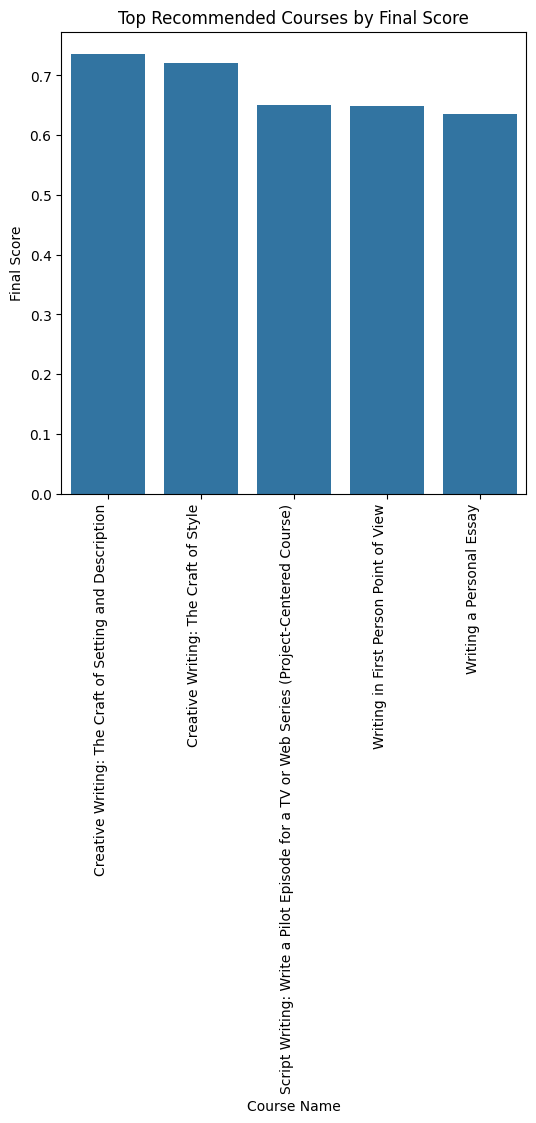

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.barplot(x='Course Name', y='Final Score', data=top_recommended_courses)
plt.xticks(rotation=90, ha='right')
plt.title('Top Recommended Courses by Final Score')
plt.tight_layout()
plt.show()


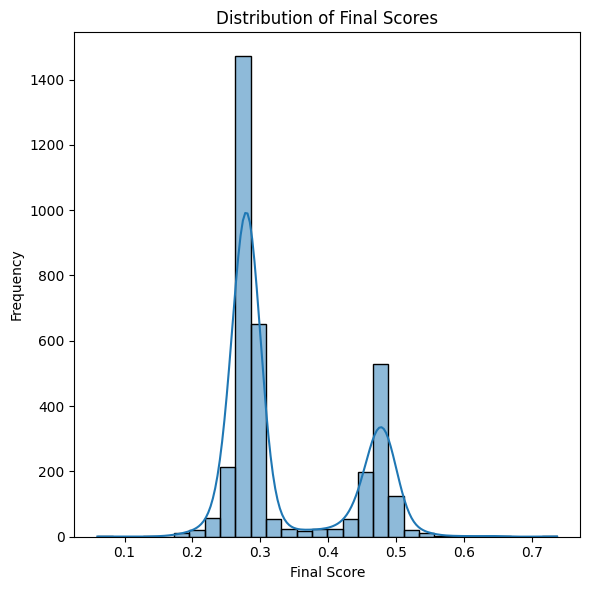

In [33]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Final Score'], kde=True, bins=30)
plt.title('Distribution of Final Scores')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


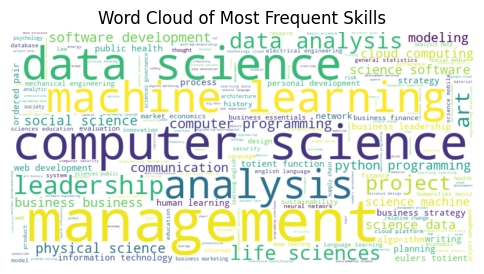

In [34]:
from wordcloud import WordCloud

# Combine all skills into a single string
all_skills = ' '.join(df['Skills'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Skills")
plt.show()
